In [7]:
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [8]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [9]:
# load dataset
dataframe = pandas.read_csv("DONNES/train_cap2018.csv")
dataset = dataframe.values
X = dataset[:,1:58].astype(float)
Y = dataset[:,59]

where_are_NaNs = numpy.isnan(X) #Remplace les valeurs NaN par des 0
X[where_are_NaNs] = 0

#print(X)
#print(Y)

In [10]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

#print(encoded_Y)
#list(encoder.inverse_transform(encoded_Y)) la démarche inverse

In [27]:
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(8, input_dim=57, activation='relu'))
	model.add(Dense(8, activation='sigmoid'))
	model.add(Dense(6, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [28]:
model = baseline_model()
model.fit(X, dummy_y, epochs=150, batch_size=24) #Attention aux paramètres, certains changement provoquent l'overfitting !

Epoch 1/150
27310/27310 [==============================] - 5s 200us/step - loss: 1.4059 - acc: 0.3839 0s - loss: 1.4309
Epoch 2/150
27310/27310 [==============================] - 5s 193us/step - loss: 1.0836 - acc: 0.5442
Epoch 3/150
27310/27310 [==============================] - 5s 173us/step - loss: 0.9494 - acc: 0.6164
Epoch 4/150
27310/27310 [==============================] - 4s 142us/step - loss: 0.9131 - acc: 0.6278
Epoch 5/150
27310/27310 [==============================] - 4s 155us/step - loss: 0.8810 - acc: 0.6521
Epoch 6/150
27310/27310 [==============================] - 4s 148us/step - loss: 0.8597 - acc: 0.6670
Epoch 7/150
27310/27310 [==============================] - 4s 161us/step - loss: 0.8517 - acc: 0.6647
Epoch 8/150
27310/27310 [==============================] - 5s 165us/step - loss: 0.8512 - acc: 0.6604
Epoch 9/150
27310/27310 [==============================] - 4s 150us/step - loss: 0.8342 - acc: 0.6774 0s - loss: 0.8350 - acc: 
Epoch 10/150
27310/27310 [============

KeyboardInterrupt: 

In [15]:
# evaluate the model
scores = model.evaluate(X, dummy_y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

27310/27310 [==============================] - 2s 55us/step

acc: 73.64%


In [24]:
#predictions = model.predict(X)
predictions = model.predict_classes(X)
classes = encoder.inverse_transform(predictions)

print(classes)
# round predictions
#for x in predictions :
#    print(x)
#print(dummy_y)

['C1' 'C1' 'C1' ... 'A1' 'A1' 'A1']


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


<class 'numpy.ndarray'>


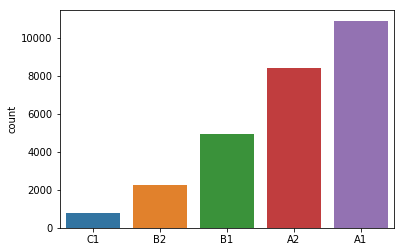

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

print(type(classes))
sns.countplot(classes,label="Count")
plt.show()